In [858]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

## Load files

In [859]:
M1 = np.loadtxt("txt_files_py2/probNico25deg.txt") #probNico25deg probNico25deg30beams probStandard30beams
M2 = np.loadtxt("txt_files_py2/probStandard.txt") #probStandard  probAdaptive5e5doubleKpBy4 probAdaptive30beamsDoubleBy5_2
M3 = np.loadtxt("txt_files_py2/probAdaptive5e5doubleKpBy4.txt") 

# Put in seconds
M1[:,0] = M1[:,0]*pow(10, -9)
M2[:,0] = M2[:,0]*pow(10, -9)
M3[:,0] = M3[:,0]*pow(10, -9)

M0 = 0
# Initialize at 0sec
if M1[0,0]<M2[0,0]:
    M0 = M1[0,0]
else:
    M0 = M2[0,0]
    
M1[:,0] = M1[:,0] - M0
M2[:,0] = M2[:,0] - M0
M3[:,0] = M3[:,0] - M0

## Compute p mean

#### Nicolas

In [860]:
# Careful: I took out first and last laser for all p because laser detect computer...
M1_p = M1[:,2:-1]
middle1 = int(M1_p.shape[1]/2)+1
M1_p_mean = np.nanmean(M1_p,axis=1)
p1 = np.mean(M1_p_mean)
print('p =',p1)

M1_p_r = M1[:,2:middle1+1]
M1_p_mean_r = np.nanmean(M1_p_r,axis=1)
p1_r = np.mean(M1_p_mean_r)
print('p_right =',p1_r)

M1_p_l = M1[:,middle1+2:-1]
M1_p_mean_l = np.nanmean(M1_p_l,axis=1)
p1_l = np.mean(M1_p_mean_l)
print('p_left =',p1_l)


p = 0.7880775852046097
p_right = 0.7712395991749387
p_left = 0.8773678515625001


#### Standard

In [861]:
M2_p = M2[:,2:-1]
middle2 = int(M2_p.shape[1]/2)+1
M2_p_mean = np.nanmean(M2_p,axis=1)
p2 = np.mean(M2_p_mean)
print('p =',p2)

M2_p_r = M2[:,2:middle2+1]
M2_p_mean_r = np.nanmean(M2_p_r,axis=1)
p2_r = np.mean(M2_p_mean_r)
print('p_right =',p2_r)

M2_p_l = M2[:,middle2+2:-1]
M2_p_mean_l = np.nanmean(M2_p_l,axis=1)
p2_l = np.mean(M2_p_mean_l)
print('p_left =',p2_l)

p = 0.7170779515905479
p_right = 0.604422015857011
p_left = 0.8805296669126691


In [862]:
M3_p = M3[:,2:-1]
middle3 = int(M3_p.shape[1]/2)+1
M3_p_mean = np.nanmean(M3_p,axis=1)
p3 = np.mean(M3_p_mean)
print('p =',p3)

M3_p_r = M3[:,2:middle3+1]
M3_p_mean_r = np.nanmean(M3_p_r,axis=1)
p3_r = np.mean(M3_p_mean_r)
print('p_right =',p3_r)

M3_p_l = M3[:,middle3+2:-1]
M3_p_mean_l = np.nanmean(M3_p_l,axis=1)
p3_l = np.mean(M3_p_mean_l)
print('p_left =',p3_l)

p = 0.7771902886339755
p_right = 0.7482967757633395
p_left = 0.8765789800062775


In [863]:
a = middle1+1
a

8

#### Mean for each beam for both cases

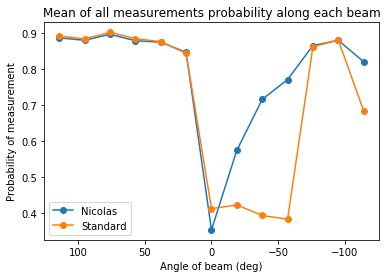

In [864]:
step = 135*2 / M1[:,1:].shape[1]+1
alpha = (np.arange(M1_p.shape[1])-round(M1_p.shape[1]/2))*step
plt.plot(alpha, np.nanmean(M1_p,axis=0), 'o-', label='Nicolas')
plt.plot(alpha, np.nanmean(M2_p,axis=0), 'o-', label='Standard')
plt.title('Mean of all measurements probability along each beam')
plt.xlabel('Angle of beam (deg)')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.legend()

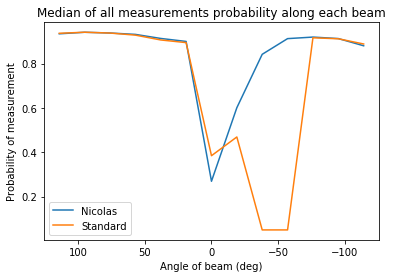

In [865]:
plt.plot(alpha, np.nanmedian(M1_p,axis=0), label='Nicolas')
plt.plot(alpha, np.nanmedian(M2_p,axis=0), label='Standard')
plt.title('Median of all measurements probability along each beam')
plt.xlabel('Angle of beam (deg)')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.legend()

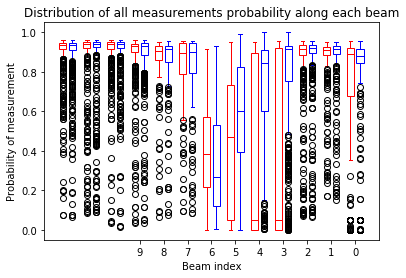

In [866]:
def draw_plot(data, offset,edge_color, fill_color):
    pos = np.arange(data.shape[1])+offset 
    # Filter data using np.isnan
    mask = ~np.isnan(data)
    filtered_data = [d[m] for d, m in zip(data.T, mask.T)]
    bp = ax.boxplot(filtered_data, positions= pos, widths=0.3, patch_artist=True, manage_xticks=False)
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

fig, ax = plt.subplots()
draw_plot(M1_p, -0.2, "blue", "white")
draw_plot(M2_p, +0.2,"red", "white")
plt.xticks(xrange(10))
plt.title('Distribution of all measurements probability along each beam')
plt.xlabel('Beam index')
plt.ylabel('Probability of measurement')

plt.gca().invert_xaxis()
plt.show()

## Plot distribution

#### Nicolas

#### Standard

## During time

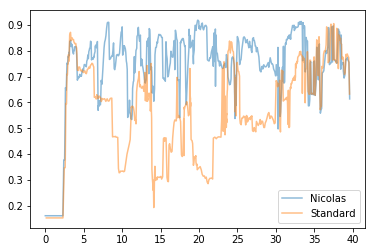

In [867]:
plt.plot(M1[:,0],M1_p_mean_r, label='Nicolas', alpha=0.5)
plt.plot(M2[:,0],M2_p_mean_r, label='Standard', alpha=0.5)
plt.legend()

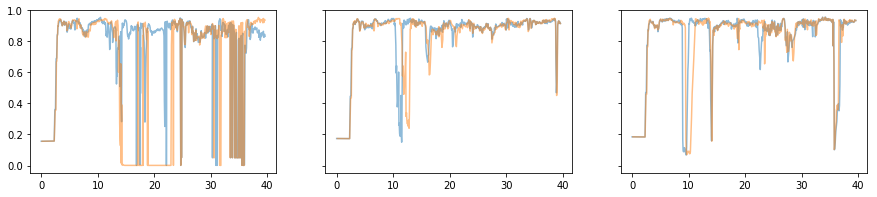

In [868]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,0], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,0], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,1], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,1], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,2], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,2], label='standard', alpha=0.5)

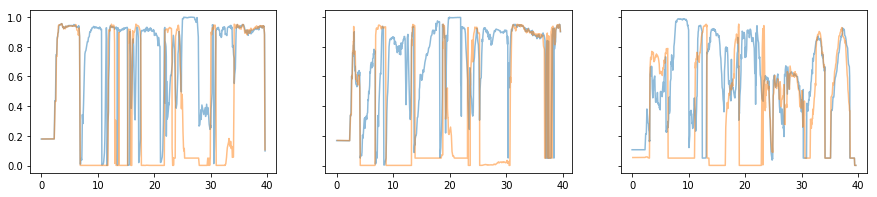

In [869]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,3], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,3], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,4], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,4], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,5], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,5], label='standard', alpha=0.5)

In [870]:
if M2.shape[1] > 16:
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
    ax[0].plot(M1[:,0],M1_p[:,6], label='nico', alpha=0.5)
    ax[0].plot(M2[:,0],M2_p[:,6], label='standard', alpha=0.5)
    ax[1].plot(M1[:,0],M1_p[:,7], label='nico', alpha=0.5)
    ax[1].plot(M2[:,0],M2_p[:,7], label='standard', alpha=0.5)
    ax[2].plot(M1[:,0],M1_p[:,8], label='nico', alpha=0.5)
    ax[2].plot(M2[:,0],M2_p[:,8], label='standard', alpha=0.5)

In [871]:
if M2.shape[1] > 16:
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
    ax[0].plot(M1[:,0],M1_p[:,9], label='nico', alpha=0.5)
    ax[0].plot(M2[:,0],M2_p[:,9], label='standard', alpha=0.5)
    ax[1].plot(M1[:,0],M1_p[:,10], label='nico', alpha=0.5)
    ax[1].plot(M2[:,0],M2_p[:,10], label='standard', alpha=0.5)
    ax[2].plot(M1[:,0],M1_p[:,11], label='nico', alpha=0.5)
    ax[2].plot(M2[:,0],M2_p[:,11], label='standard', alpha=0.5)

In [872]:
if M2.shape[1] > 16:
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
    ax[0].plot(M1[:,0],M1_p[:,12], label='nico', alpha=0.5)
    ax[0].plot(M2[:,0],M2_p[:,12], label='standard', alpha=0.5)
    ax[1].plot(M1[:,0],M1_p[:,13], label='nico', alpha=0.5)
    ax[1].plot(M2[:,0],M2_p[:,13], label='standard', alpha=0.5)
    ax[2].plot(M1[:,0],M1_p[:,14], label='nico', alpha=0.5)
    ax[2].plot(M2[:,0],M2_p[:,14], label='standard', alpha=0.5)

In [873]:
def plot_beam_graph(beam_index, plot_mean=False):
    plt.figure(figsize=(15,3))
    plt.plot(M1[:,0],M1_p[:,beam_index], label='Nicolas', alpha=0.5, color='tab:blue', linewidth=2)
    plt.plot(M2[:,0],M2_p[:,beam_index], label='Standard', alpha=0.5, color='tab:orange',linewidth=2)
    if plot_mean == True:
        plt.plot(M1[:,0],np.ones((M1[:,0].shape[0]))*np.nanmean(M1_p[:,beam_index]), alpha=0.5, color='tab:blue',linewidth=1)
        plt.plot(M2[:,0],np.ones((M2[:,0].shape[0]))*np.nanmean(M2_p[:,beam_index]), alpha=0.5, color='tab:orange', linewidth=1)
    plt.legend()
    print('p_nicolas =',np.nanmean(M1_p[:,beam_index]), 'p_standard =', np.nanmean(M2_p[:,beam_index]))

In [881]:
alpha2 = (np.arange(M1[:,2:-1].shape[1])-round(M1[:,2:-1].shape[1]/2))*step
alpha2 = abs(90+alpha)
def plot_beam_graph_mult(beam_indexes):
    nb_plots = beam_indexes.shape[0]
    fig, ax = plt.subplots(nb_plots, 1, sharey=True, sharex=True, figsize=(15,3*nb_plots))
    fig.text(0.5, 0.07, 'Time (s)', ha='center')
    fig.text(0.07, 0.5, 'Probability of measurement', va='center', rotation='vertical')
    for i in range(nb_plots):
        ax[i].plot(M1[:,0],M1_p[:,beam_indexes[i]], label='Rabany-Jiang (T=25deg)', alpha=0.3, color='tab:blue', linewidth=2)
        ax[i].plot(M2[:,0],M2_p[:,beam_indexes[i]], label='Standard', alpha=0.3, color='tab:orange', linewidth=2)
        ax[i].plot(M3[:,0],M3_p[:,beam_indexes[i]], label='Adaptibe Rabany-Jiang', alpha=0.5, color='tab:red', linewidth=2)
        ax[i].legend()
        p_nicolas = format(np.nanmean(M1_p[:,beam_indexes[i]]),'.2f')
        p_standard = format(np.nanmean(M2_p[:,beam_indexes[i]]),'.2f')
        p_adaptive = format(np.nanmean(M3_p[:,beam_indexes[i]]),'.2f')
        angle = format(alpha2[beam_indexes[i]], '.0f')
        ax[i].set_title('incident angle ~={}deg    ($\mu$_nicolas={},  $\mu$_standard={})'.format(angle, p_nicolas, p_standard))

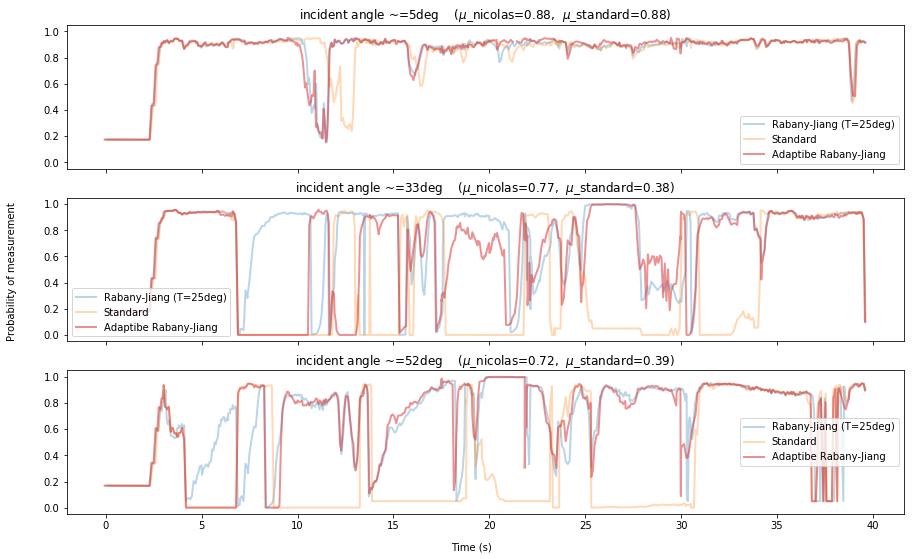

In [882]:
beam_indexes = np.array([1,3,4])
plot_beam_graph_mult(beam_indexes)

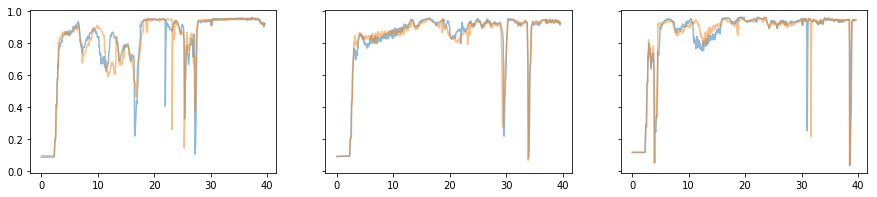

In [876]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,7], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,7], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,8], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,8], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,9], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,9], label='standard', alpha=0.5)

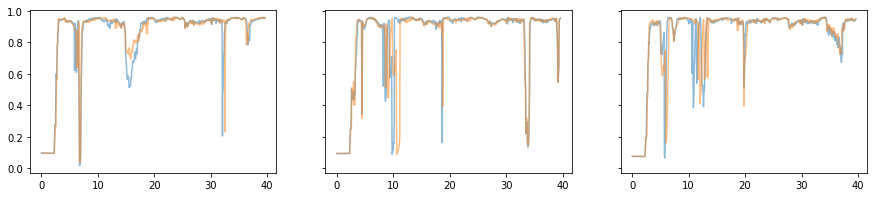

In [877]:
fig, ax = plt.subplots(1,3,sharex=True,sharey=True, figsize=(15,3))
ax[0].plot(M1[:,0],M1_p[:,10], label='nico', alpha=0.5)
ax[0].plot(M2[:,0],M2_p[:,10], label='standard', alpha=0.5)
ax[1].plot(M1[:,0],M1_p[:,11], label='nico', alpha=0.5)
ax[1].plot(M2[:,0],M2_p[:,11], label='standard', alpha=0.5)
ax[2].plot(M1[:,0],M1_p[:,12], label='nico', alpha=0.5)
ax[2].plot(M2[:,0],M2_p[:,12], label='standard', alpha=0.5)

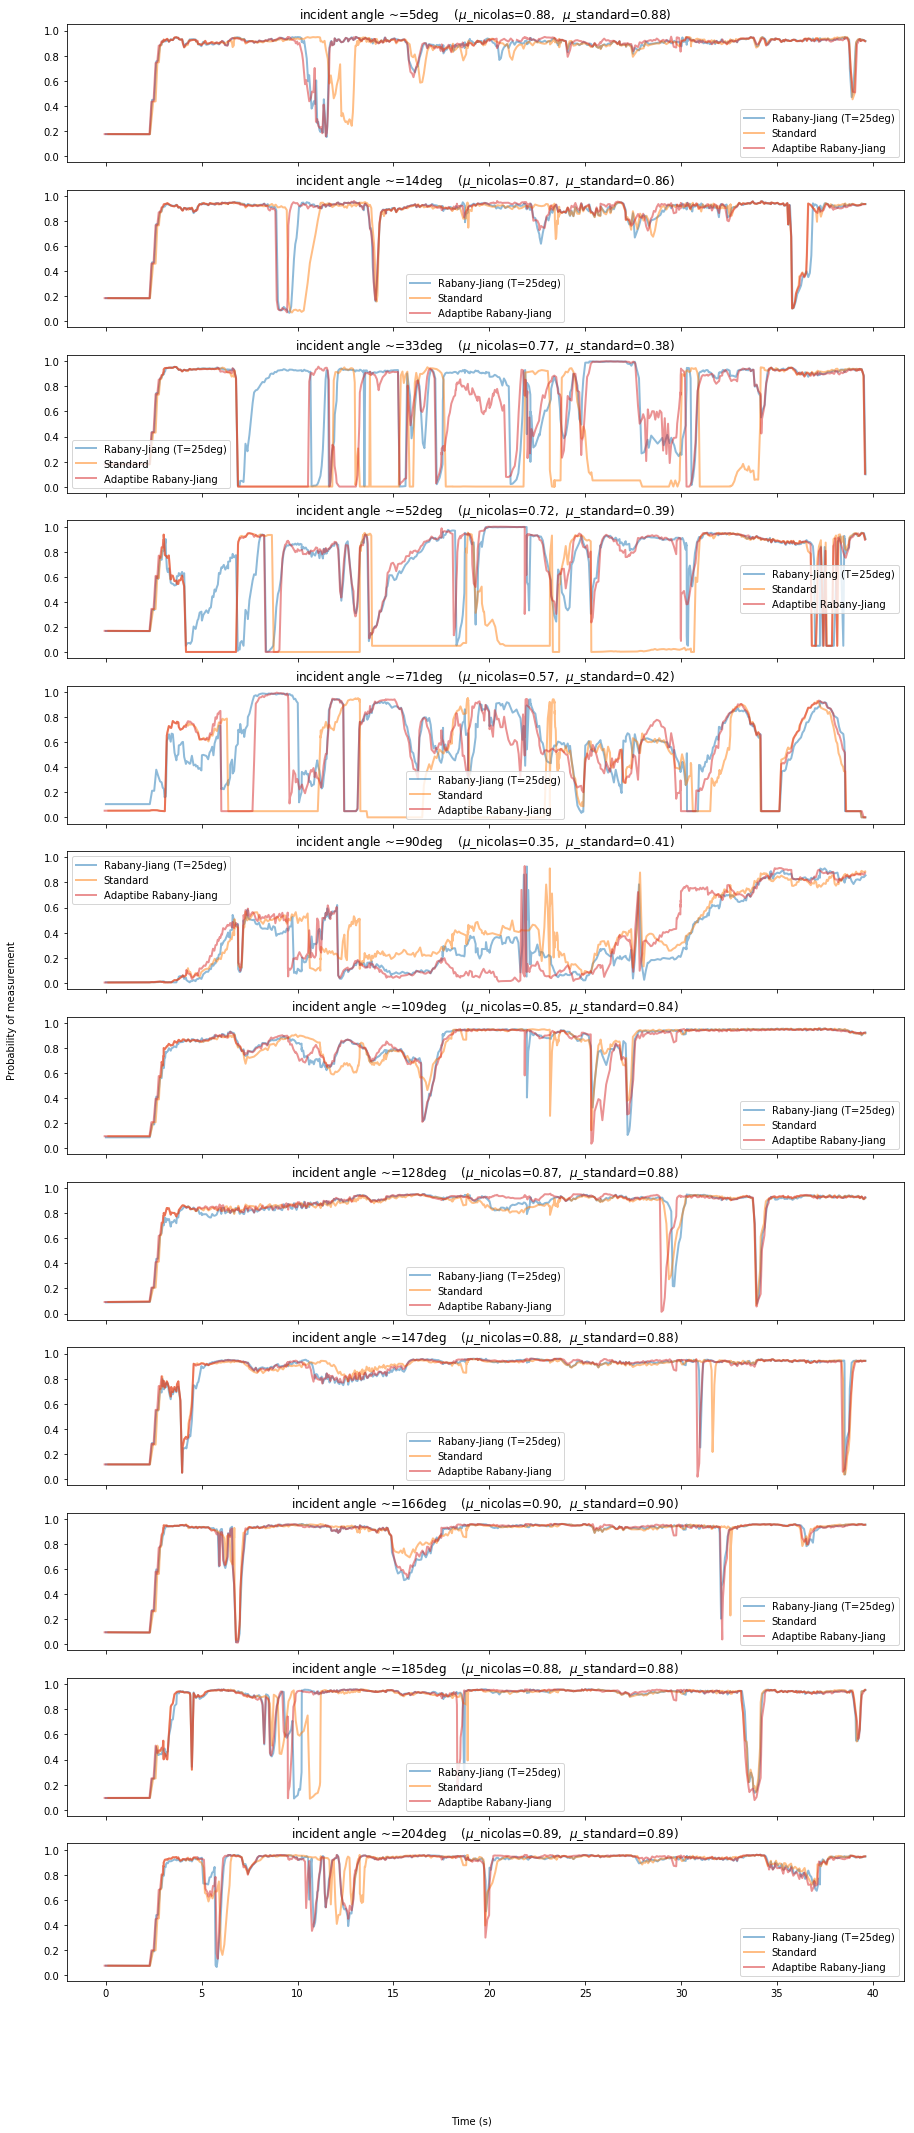

In [878]:
beam_indexes2 = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
plot_beam_graph_mult(beam_indexes2)